<a href="https://colab.research.google.com/github/krishnashahh/TradingPsych_Evaluation_by_KKS/blob/main/TradingPsych_Evaluation_by_KKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing dependencies
!pip install pandas matplotlib seaborn plotly scikit-learn --quiet

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install -U gdown #adding data sets

import gdown

# Trader Data File
gdown.download(id="1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs", output="trader_data.csv", quiet=False)

# Fear & Greed Index File
gdown.download(id="1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf", output="fear_greed.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 68.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 31.3MB/s]


'fear_greed.csv'

In [6]:
import pandas as pd

# Loading the correct downloaded files
sentiment_df = pd.read_csv('fear_greed.csv')         # Not 'fear_greed_index.csv'
trader_df = pd.read_csv('trader_data.csv')           # Not 'historical_data.csv'

# Preview
print("Sentiment Data:")
print(sentiment_df.head())

print("\nTrader Data:")
print(trader_df.head())


Sentiment Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1

In [7]:
import pandas as pd

# Loading with proper encoding
sentiment_df = pd.read_csv('fear_greed.csv', encoding='utf-8-sig')
sentiment_df.columns = sentiment_df.columns.str.strip()

# Loading trader data normally
trader_df = pd.read_csv('trader_data.csv')

# Cleaning & preparing both dataframes
# Strip headers, fixing date format, title-case categories

# Sentiment data cleaning
sentiment_df.rename(columns=lambda x: x.strip().title(), inplace=True)
sentiment_df.rename(columns={'Date': 'Date', 'Classification': 'Sentiment'}, inplace=True)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], errors='coerce')
sentiment_df.dropna(subset=['Date'], inplace=True)

# Trader data cleaning
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce').fillna(0)
trader_df['Side'] = trader_df['Side'].str.strip().str.title()
trader_df.dropna(subset=['Date'], inplace=True)

In [8]:
# Merge sentiment with trader data on date
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'Sentiment']], on='Date', how='left')
merged_df['Sentiment'].fillna('Unknown', inplace=True)

# Preview
print(merged_df[['Date', 'Account', 'Closed PnL', 'Sentiment']].head())




                 Date                                     Account  Closed PnL  \
0 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed         0.0   
1 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed         0.0   
2 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed         0.0   
3 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed         0.0   
4 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed         0.0   

  Sentiment  
0   Unknown  
1   Unknown  
2   Unknown  
3   Unknown  
4   Unknown  


<ipython-input-8-93fcca8f3810>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Sentiment'].fillna('Unknown', inplace=True)


In [9]:
# Geting high-level insights
print("Trade Counts by Sentiment:\n", merged_df['Sentiment'].value_counts())
print("\nAvg PnL by Sentiment:\n", merged_df.groupby('Sentiment')['Closed PnL'].mean())


Trade Counts by Sentiment:
 Sentiment
Unknown          211080
Fear                 50
Extreme Greed        46
Greed                33
Neutral               8
Extreme Fear          7
Name: count, dtype: int64

Avg PnL by Sentiment:
 Sentiment
Extreme Fear    -23.260258
Extreme Greed     8.401634
Fear              3.269807
Greed             7.398914
Neutral           0.000000
Unknown          48.779267
Name: Closed PnL, dtype: float64


<ipython-input-21-3c475a34d3ec>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


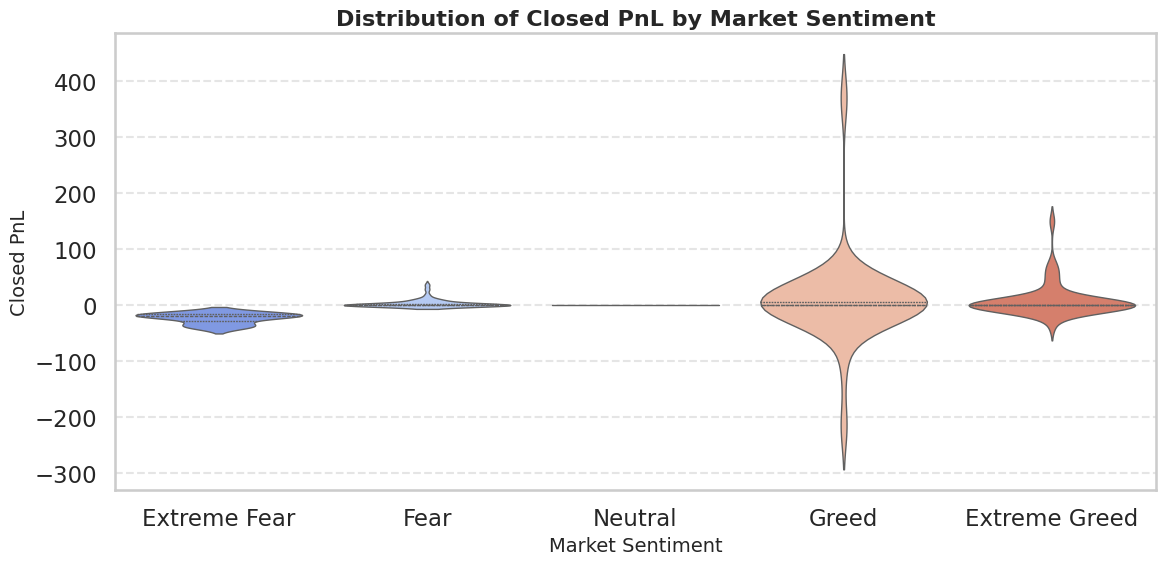

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seting a clean, modern style
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(12, 6))

# Defining order if needed for logical sentiment progression
ordered_sentiments = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
merged_df['Sentiment'] = pd.Categorical(merged_df['Sentiment'], categories=ordered_sentiments, ordered=True)

# Violin plot for detailed distribution insights
sns.violinplot(
    x='Sentiment',
    y='Closed PnL',
    data=merged_df,
    palette='coolwarm',
    inner='quartile',  # shows median and quartiles inside violins
    linewidth=1
)

# Adding title and labels
plt.title('Distribution of Closed PnL by Market Sentiment', fontsize=16, weight='bold')
plt.xlabel('Market Sentiment', fontsize=14)
plt.ylabel('Closed PnL', fontsize=14)

# Improved layout and show grid lightly
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-23-4a210bef2af7>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_avg = merged_df.groupby(['Date', 'Sentiment'])['Closed PnL'].mean().reset_index()


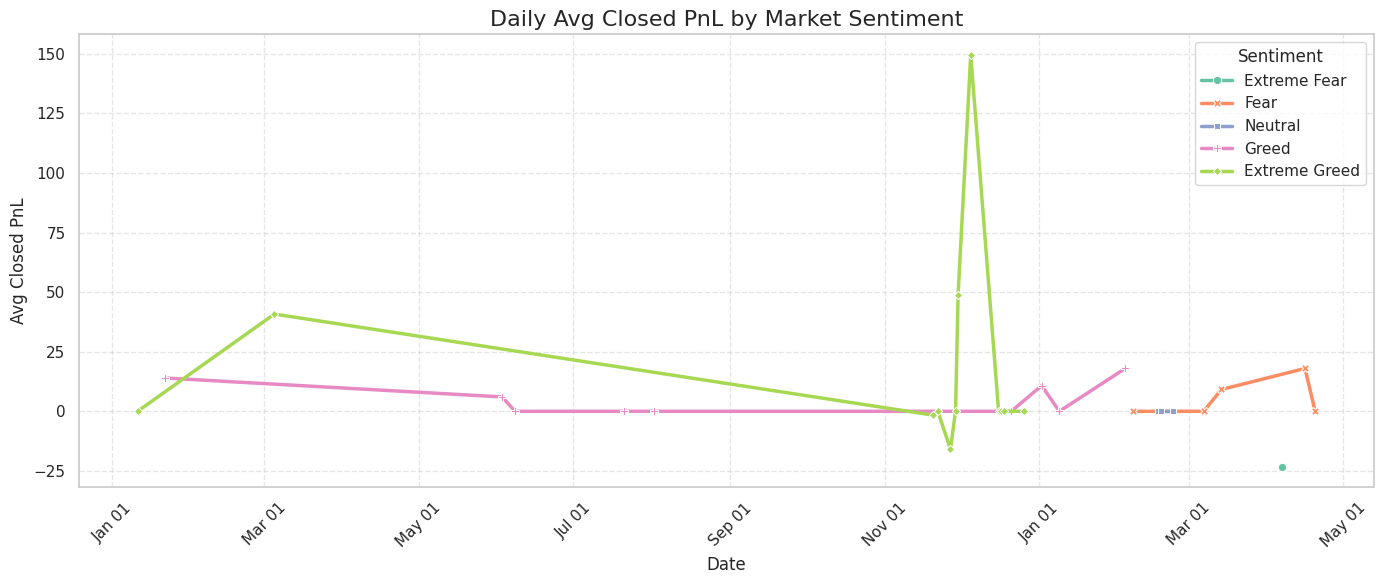

In [23]:
# GraphB-Styled Line Plot for Daily Avg PnL by Sentiment
import matplotlib.dates as mdates

# Grouping by actual column: 'Sentiment'
daily_avg = merged_df.groupby(['Date', 'Sentiment'])['Closed PnL'].mean().reset_index()

# Ploting setup
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Line plot with style
palette = sns.color_palette("Set2", n_colors=daily_avg['Sentiment'].nunique())
sns.lineplot(
    data=daily_avg,
    x='Date',
    y='Closed PnL',
    hue='Sentiment',
    style='Sentiment',
    markers=True,
    dashes=False,
    linewidth=2.5,
    palette=palette
)

# Formatting
plt.title('Daily Avg Closed PnL by Market Sentiment', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Avg Closed PnL')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # e.g. Jan 01
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Sentiment')
plt.show()



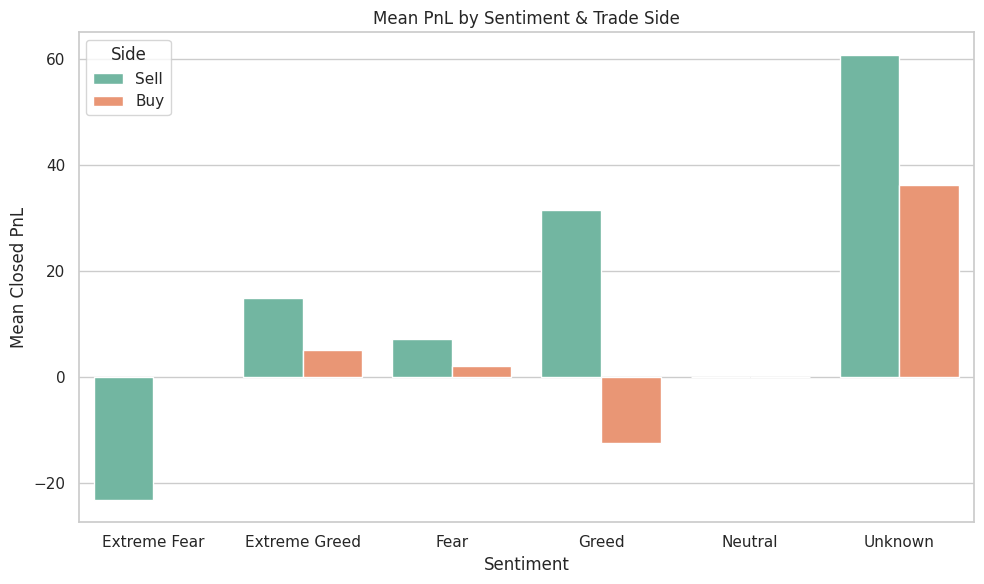

In [12]:
# Breakdown of Side strategy by Sentiment
side_analysis = merged_df.groupby(['Sentiment', 'Side'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=side_analysis, x='Sentiment', y='Closed PnL', hue='Side', palette='Set2')
plt.title('Mean PnL by Sentiment & Trade Side')
plt.ylabel('Mean Closed PnL')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()


In [13]:
# Saved cleaned and merged data
merged_df.to_csv('final_trader_sentiment.csv', index=False)


<ipython-input-24-b936fd4a3750>:18: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


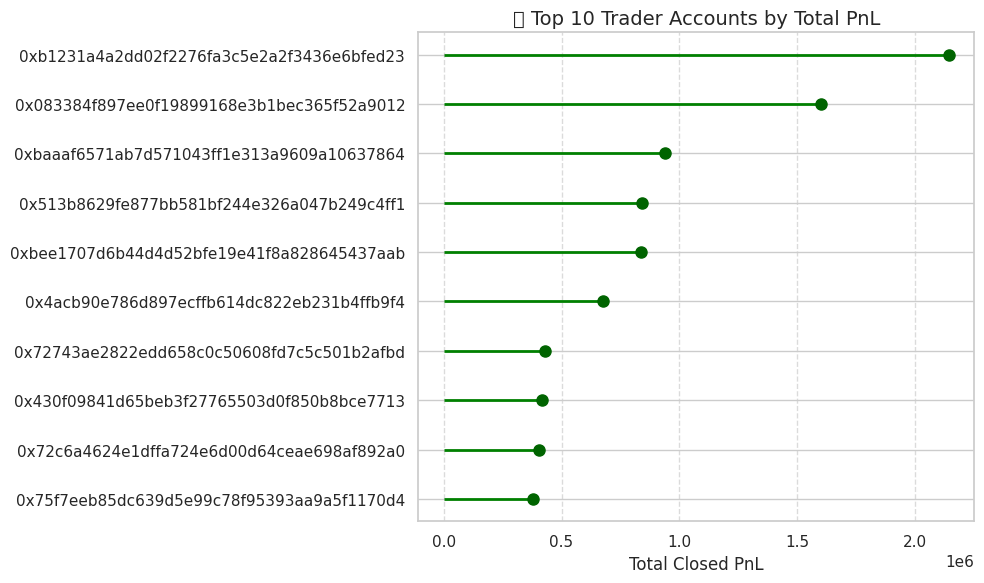

In [24]:
# Lollipop Chart for Top Traders
import matplotlib.pyplot as plt

# Computed top traders
top_traders = merged_df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10)

# Sorted for horizontal display
top_traders = top_traders.sort_values()

# Created figure
plt.figure(figsize=(10, 6))
plt.hlines(y=top_traders.index, xmin=0, xmax=top_traders.values, color='green', linewidth=2)
plt.plot(top_traders.values, top_traders.index, "o", color='darkgreen', markersize=8)

plt.title('🏆 Top 10 Trader Accounts by Total PnL', fontsize=14)
plt.xlabel('Total Closed PnL')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
